# Table of content

1. [dhakaflats_dfassessment](#dhakaflats_df-assessment) -> [Report summary](#assessment-report)
1. [dhakaflats_df cleaning](#dhakaflats_df-cleaning)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from googletrans import Translator, constants # https://www.thepythoncode.com/article/translate-text-in-python
from slugify import slugify
import os

%matplotlib inline

# create a translator object
translator = Translator()

# translate a spanish text to english text (by default)
translation = translator.translate("Hola Mundo")

print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")


In [2]:
# CSV folders

raw_data_folder="../../../data/Raw_Data"
cleaned_data_folder="../../../data/CLeaned_Data"

dhakaflats_folder= f"{raw_data_folder}/dhakaflats_spider"
cleaned_dhakaflats_folder= f"{cleaned_data_folder}/dhakaflats"

# <span id="dhakaflats_df-assessment"> </span>

## Assessing `dhakaflats_spider_2023-04-07`

In [3]:
dhakaflats_df=pd.read_csv(f"{dhakaflats_folder}/jeisoy_dhakaflats_spider_2023-04-07.csv")
dhakaflats_df = dhakaflats_df.rename(columns={'title': 'name','rent': 'price', 'description': 'property_description', 'category': 'purpose'})

dhakaflats_df.head().T

,0,1,2,3,4
name,৮৫০ বর্গফুট এর ফ্লাট @ মগবাজার,1500 sft flat @ Uttara 11,3 bed + 3 bath + 1 family space + 2 balconies ...,Mr,Flat ready to Construction by land owner
location,"Dhaka, Maghbazar","Dhaka, Uttara","Dhaka, MohakhaliDOHS","Dhaka, Dhanmondi","Dhaka, Mirpur"
price,"Tk.6,000.00","Tk.6,000.00","Tk.60,000.00","Tk.25,000.00","Tk.4,500,000.00"
property_description,০১৮৪২৪১২০৮৯\n১. হস্তান্তর জুন ২০১৮ ইং \n২. ৮ম ...,3 bed 3 bath lift generator and 1 garage near ...,"The apartment is in the heart of New D.O.H.S, ...",I am Mohamed ibrahim from india and working in...,1050 sqf. flat ready to construction @ mirpur-...
date_posted,"Jan 22, 2018",8 hours ago,2 days ago,3 days ago,3 days ago
purpose,Flats For Sale,Flats For Sale,Flats for Rent,Flats for Rent,Flats For Sale
url,http://dhakaflats.com/details.php?id=1&search_...,http://dhakaflats.com/details.php?id=16&search...,http://dhakaflats.com/details.php?id=5&search_...,http://dhakaflats.com/details.php?id=35&search...,http://dhakaflats.com/details.php?id=3&search_...
date_crawled,2023-04-07,2023-04-07,2023-04-07,2023-04-07,2023-04-07


`property_overview` & `property_overview` has some samples not enlish. These needs to be translated to english (Quality issue)

In [4]:
dhakaflats_df.shape

(229, 8)

In [5]:
dhakaflats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  229 non-null    object
 1   location              227 non-null    object
 2   price                 218 non-null    object
 3   property_description  229 non-null    object
 4   date_posted           229 non-null    object
 5   purpose               229 non-null    object
 6   url                   229 non-null    object
 7   date_crawled          229 non-null    object
dtypes: object(8)
memory usage: 14.4+ KB


In [6]:
dhakaflats_df["price"].unique()

array(['Tk.6,000.00', 'Tk.60,000.00', 'Tk.25,000.00', 'Tk.4,500,000.00',
       'Tk.87,000.00', 'Tk.4,500.00', 'Tk.62.00', 'Tk.4,600,000.00',
       'Tk.55,000.00', 'Tk.7,500,000.00', 'Tk.495,000,000.00',
       'Tk.13,000.00', 'Tk.6,500.00', 'Tk.3,600,000.00', 'Tk.14,000.00',
       'Tk.3,900,000.00', 'Tk.4,000,000.00', 'Tk.5,500,000.00',
       'Tk.3,500,000.00', 'Tk.11,700.00', 'Tk.8,600.00',
       'Tk.4,700,000.00', 'Tk.20,000.00', 'Tk.150.00', 'Tk.3,000.00',
       'Tk.7,000.00', 'Tk.15,000.00', 'Tk.4,000.00', 'Tk.50,000.00',
       'Tk.120,000.00', 'Tk.13,000,000.00', 'Tk.2,000.00', 'Tk.36,000.00',
       'Tk.27,000.00', 'Tk.6,250,000.00', nan, 'Tk.5,800,000.00',
       'Tk.35,000.00', 'Tk.19,000.00', 'Tk.7,800,000.00', 'Tk.22,000.00',
       'Tk.8,500.00', 'Tk.2,250,000.00', 'Tk.28,000.00', 'Tk.0.50',
       'Tk.3,800.00', 'Tk.5,000.00', 'Tk.2,200,000.00', 'Tk.5,500.00',
       'Tk.2,600,000.00', 'Tk.3,300.00', 'Tk.6,000,000.00',
       'Tk.1,800,000.00', 'Tk.37,000.00', 'Tk.11

* `price` should be decimal, not string

In [7]:
dhakaflats_df["property_description"][0]

'০১৮৪২৪১২০৮৯\n১. হস্তান্তর জুন ২০১৮ ইং \n২. ৮ম তলায়\nঠিকানা:১০/আই/ ১, মিরবাগ নতুন রাস্তা, মিরবাগ মোড়, মগবাজার,ঢাকা।\nবেড:২\nবাথ:২\nফ্ল্যাটের আয়তন:৮...'

In [8]:
dhakaflats_df["property_description"][15]

'Handover june, 2020\n9 Storied building\n7th floor\nFlat area 990 sft\n2 Bed, 2 Bath,2Veranda\nKitchen, Drawing, Dinning\nAddress-House-18, Road-4,...'

In [9]:
dhakaflats_df["name"][0]

'৮৫০ বর্গফুট এর ফ্লাট @ মগবাজার'

In [10]:
dhakaflats_df["name"][150]

'flat to let for commercial'

In [11]:
property_per_purpose = dhakaflats_df["purpose"].value_counts()
property_per_purpose

Flats For Sale       126
Flats for Rent        93
Agents & Services      5
Sublets                5
Name: purpose, dtype: int64

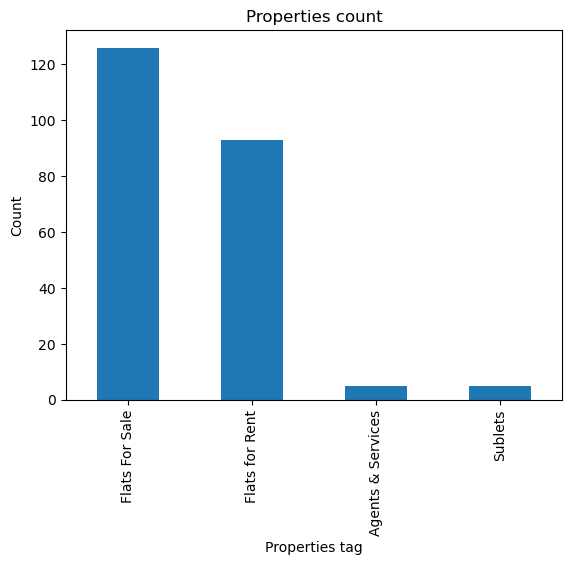

In [12]:
property_per_purpose.plot(kind="bar")
plt.xlabel("Properties tag")
plt.ylabel("Count")
plt.title("Properties count");

<span id="assessment-report"> </span>

#### Assessment report summary

##### Quality issues
1. `Name` has some samples not en English. Those samples should be translated to English
1. `Description` has samples that are not en English. Those samples should be translated to English. (quality issue)
1. `Date posted` should be of type datetime, not str. Needs to check also those with 8 hours and 2 days ago entries
1. `Price` should be of type float, not str.
1. `Purpose` should have Rent or Sale as values. This is not really an issue, its goal is only to keep values consistent accross all cleaned datasets.


##### Tidiness issues
1. `location` should be splitted to `city` and `address`. (tidiness issue)
1. Column names should become lowercase for consistency with the other datasets cleaned. (tidiness issue)

<span id="dhakaflats_df-cleaning"> </span>

## Cleaning `dhakaflats`

###  `Name` has some samples not en English ( [quality issues #1 & #2](#assessment-report) )

`Name` and `Description` have some samples not en English. Those samples should be translated to English.

# init the Google API translator
translator = Translator()


# translate a spanish text to english text (by default)
translation = translator.translate("Hola Mundo")
print(translation)
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

tr = translator.translate(dhakaflats_df["name"].to_list()) 
print(f"{tr.origin} ({tr.src}) --> {tr.text} ({tr.dest})")

tr = translator.translate(dhakaflats_df["Name"].to_list())
tr[:5]

i = 0
for t in tr:
    print(f"{t.origin} ({t.src}) --> {t.text} ({t.dest})")
    
    i+=1
    if i==5:
        break

###  `Date posted` ( [quality issues #3](#assessment-report) )

`Date posted` must be convert to date instead of string, check the entries like 8 hours and 2 days ago 

In [13]:
from datetime import datetime, timedelta
import pandas as pd
import pytz

def parse_date(date_str):
    now = datetime(2023, 4, 7, tzinfo=pytz.UTC)
    if "ago" in date_str:
        num_hours_ago = int(date_str.split()[0])
        return now - timedelta(hours=num_hours_ago)
    else:
        return pd.to_datetime(date_str)


In [14]:
dhakaflats_df["date_posted"] = dhakaflats_df["date_posted"].apply(parse_date)


In [15]:
dhakaflats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  229 non-null    object
 1   location              227 non-null    object
 2   price                 218 non-null    object
 3   property_description  229 non-null    object
 4   date_posted           229 non-null    object
 5   purpose               229 non-null    object
 6   url                   229 non-null    object
 7   date_crawled          229 non-null    object
dtypes: object(8)
memory usage: 14.4+ KB


### `price` content is not uniform accross the dataset ( [quality issue #4 & #5](#bproperty-assessment-report) )

`price` content is not uniform accross the dataset. Some are in `Lakh`, other in `Crore`, etc... The unit used for the price should be uniformized. A special attention should be paid to the fact that there are `price` without unit.  

Furthermore, `price` should be decimal, not string.

In [16]:
dhakaflats_df["price"].unique()
dhakaflats_df['price'] = dhakaflats_df['price'].str.replace('Tk.', '', regex=True).str.replace(',', '', regex=True).astype(float)
dhakaflats_df.head()

,name,location,price,property_description,date_posted,purpose,url,date_crawled
0,৮৫০ বর্গফুট এর ফ্লাট @ মগবাজার,"Dhaka, Maghbazar",6000.0,০১৮৪২৪১২০৮৯\n১. হস্তান্তর জুন ২০১৮ ইং \n২. ৮ম ...,2018-01-22 00:00:00,Flats For Sale,http://dhakaflats.com/details.php?id=1&search_...,2023-04-07
1,1500 sft flat @ Uttara 11,"Dhaka, Uttara",6000.0,3 bed 3 bath lift generator and 1 garage near ...,2023-04-06 16:00:00+00:00,Flats For Sale,http://dhakaflats.com/details.php?id=16&search...,2023-04-07
2,3 bed + 3 bath + 1 family space + 2 balconies ...,"Dhaka, MohakhaliDOHS",60000.0,"The apartment is in the heart of New D.O.H.S, ...",2023-04-06 22:00:00+00:00,Flats for Rent,http://dhakaflats.com/details.php?id=5&search_...,2023-04-07
3,Mr,"Dhaka, Dhanmondi",25000.0,I am Mohamed ibrahim from india and working in...,2023-04-06 21:00:00+00:00,Flats for Rent,http://dhakaflats.com/details.php?id=35&search...,2023-04-07
4,Flat ready to Construction by land owner,"Dhaka, Mirpur",4500000.0,1050 sqf. flat ready to construction @ mirpur-...,2023-04-06 21:00:00+00:00,Flats For Sale,http://dhakaflats.com/details.php?id=3&search_...,2023-04-07


#### Define
* Convert all price to the same currency
* Convert the column to float

#### Testing

In [17]:
dhakaflats_df["price"].dtype

dtype('float64')

### Split `location` column content into adequate columns ( [tidiness issues #1](#assessment-report) )

 `location` should be splitted to `city`, `zone`, and `address`. (tidiness issue)

In [18]:
dhakaflats_df["location"]

0          Dhaka, Maghbazar
1             Dhaka, Uttara
2      Dhaka, MohakhaliDOHS
3          Dhaka, Dhanmondi
4             Dhaka, Mirpur
               ...         
224            Dhaka, Savar
225           Dhaka, Uttara
226        Dhaka, Dhanmondi
227         Dhaka, Shyamoli
228          Dhaka, Azimpur
Name: location, Length: 229, dtype: object

#### Define
* Retrieve the city, area, and address from each `location` through `get_detailed_address()`
* Update new columns (city, area, address) based on values retrieve from `location`

#### Code

In [19]:
# Retrieve city in location
dhakaflats_df["city"] = dhakaflats_df["location"].fillna('').apply(lambda x: x.split(",")[0].strip() )

# Retrieve address in location
dhakaflats_df["address"] = dhakaflats_df["location"].fillna('').apply(lambda x: ",".join(x.split(",")[1:]).strip() )

In [20]:
# Checking the content of location, city, and address
dhakaflats_df[ ["location","city","address"] ] 

,location,city,address
0,"Dhaka, Maghbazar",Dhaka,Maghbazar
1,"Dhaka, Uttara",Dhaka,Uttara
2,"Dhaka, MohakhaliDOHS",Dhaka,MohakhaliDOHS
3,"Dhaka, Dhanmondi",Dhaka,Dhanmondi
4,"Dhaka, Mirpur",Dhaka,Mirpur
...,...,...,...
224,"Dhaka, Savar",Dhaka,Savar
225,"Dhaka, Uttara",Dhaka,Uttara
226,"Dhaka, Dhanmondi",Dhaka,Dhanmondi
227,"Dhaka, Shyamoli",Dhaka,Shyamoli


In [25]:
dhakaflats_df.shape

(229, 10)

In [26]:
# Drop location column
dhakaflats_df.drop(["location"], axis=1, inplace=True)

In [27]:
# Making sure removal was successful
dhakaflats_df.shape

(229, 9)

### Set `purpose` values to `Rent` or `Sale` ( [quality issue #5](#bproperty-assessment-report) )

`purpose` should have `Rent` or `Sale` as values. This is not really an issue, its goal is only to keep values consistent accross all cleaned datasets.

In [28]:
dhakaflats_df["purpose"].unique()

array(['Sale', 'Rent', 'Agents & Services', 'Sublets'], dtype=object)

#### Define
* Replace `For Sale` by `Sale`, and `For Rent` by `Rent` 

#### Code

In [29]:
dhakaflats_df["purpose"] = dhakaflats_df["purpose"].replace({"Flats For Sale": "Sale", "Flats for Rent": "Rent"})


#### Testing

In [30]:
dhakaflats_df["purpose"].unique()

array(['Sale', 'Rent', 'Agents & Services', 'Sublets'], dtype=object)

In [31]:
dhakaflats_df.head()

,name,price,property_description,date_posted,purpose,url,date_crawled,city,address
0,৮৫০ বর্গফুট এর ফ্লাট @ মগবাজার,6000.0,০১৮৪২৪১২০৮৯\n১. হস্তান্তর জুন ২০১৮ ইং \n২. ৮ম ...,2018-01-22 00:00:00,Sale,http://dhakaflats.com/details.php?id=1&search_...,2023-04-07,Dhaka,Maghbazar
1,1500 sft flat @ Uttara 11,6000.0,3 bed 3 bath lift generator and 1 garage near ...,2023-04-06 16:00:00+00:00,Sale,http://dhakaflats.com/details.php?id=16&search...,2023-04-07,Dhaka,Uttara
2,3 bed + 3 bath + 1 family space + 2 balconies ...,60000.0,"The apartment is in the heart of New D.O.H.S, ...",2023-04-06 22:00:00+00:00,Rent,http://dhakaflats.com/details.php?id=5&search_...,2023-04-07,Dhaka,MohakhaliDOHS
3,Mr,25000.0,I am Mohamed ibrahim from india and working in...,2023-04-06 21:00:00+00:00,Rent,http://dhakaflats.com/details.php?id=35&search...,2023-04-07,Dhaka,Dhanmondi
4,Flat ready to Construction by land owner,4500000.0,1050 sqf. flat ready to construction @ mirpur-...,2023-04-06 21:00:00+00:00,Sale,http://dhakaflats.com/details.php?id=3&search_...,2023-04-07,Dhaka,Mirpur


### Save cleaned dataset

In [33]:
# Create folder in which to save cleaned dataset
if not os.path.exists(cleaned_dhakaflats_folder):
    os.makedirs(cleaned_dhakaflats_folder)
    print(f"Create folder '{cleaned_dhakaflats_folder}'")
else:
    print(f"Folder '{cleaned_dhakaflats_folder}' already exists")

Folder '../../../data/CLeaned_Data/dhakaflats' already exists


In [34]:
# Save cleaned dataset to csv
dhakaflats_df.to_csv(f"{cleaned_dhakaflats_folder}/cleaned_dhakaflats.csv", index=False)

In [35]:
# Load saved csv (to make sure it was successfully save)
clean_dhakaflats = pd.read_csv(f"{cleaned_dhakaflats_folder}/cleaned_dhakaflats.csv")
clean_dhakaflats.head(3).T

,0,1,2
name,৮৫০ বর্গফুট এর ফ্লাট @ মগবাজার,1500 sft flat @ Uttara 11,3 bed + 3 bath + 1 family space + 2 balconies ...
price,6000.0,6000.0,60000.0
property_description,০১৮৪২৪১২০৮৯\n১. হস্তান্তর জুন ২০১৮ ইং \n২. ৮ম ...,3 bed 3 bath lift generator and 1 garage near ...,"The apartment is in the heart of New D.O.H.S, ..."
date_posted,2018-01-22 00:00:00,2023-04-06 16:00:00+00:00,2023-04-06 22:00:00+00:00
purpose,Sale,Sale,Rent
url,http://dhakaflats.com/details.php?id=1&search_...,http://dhakaflats.com/details.php?id=16&search...,http://dhakaflats.com/details.php?id=5&search_...
date_crawled,2023-04-07,2023-04-07,2023-04-07
city,Dhaka,Dhaka,Dhaka
address,Maghbazar,Uttara,MohakhaliDOHS
